In [10]:
import torch
import pytorch_mask_rcnn as pmr


use_cuda = True
dataset = "coco"
ckpt_path = "/Users/nyanziba/Assignment/PyTorch-Simple-MaskRCNN/maskrcnn_coco-12.pth"
data_dir = "/Users/nyanziba/Assignment/PyTorch-Simple-MaskRCNN/image"

device = torch.device("mps" if use_cuda else "cpu")
if device.type == "mps":
    pmr.get_gpu_prop(show=True)
print("\ndevice: {}".format(device))

ds = pmr.datasets(dataset, data_dir, "val2017", train=True)
indices = torch.randperm(len(ds)).tolist()
d = torch.utils.data.Subset(ds, indices)
d = torch.utils.data.DataLoader(ds, shuffle=True)

model = pmr.maskrcnn_resnet50(True, max(ds.classes) + 1).to(device)
model.eval()
print(model.eval())
model.head.score_thresh = 0.1

if ckpt_path:
    checkpoint = torch.load(ckpt_path, map_location=device)
    model.load_state_dict(checkpoint["model"])
    print(checkpoint["eval_info"])
    del checkpoint
    
for p in model.parameters():
    p.requires_grad_(False)

cuda: False
available GPU(s): 0

device: mps
loading annotations into memory...
Done (t=1.09s)
creating index...
index created!


/Users/nyanziba/Assignment/PyTorch-Simple-MaskRCNN/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/nyanziba/Assignment/PyTorch-Simple-MaskRCNN/.venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MaskRCNN(
  (backbone): ResBackbone(
    (body): ModuleDict(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=1e-05)
        

/var/folders/4f/jyrcbm7156lc4h_v3fk1qb100000gn/T/ipykernel_3577/3605661702.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_locati

IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.246
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.411
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.250
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.034
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.154
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.545
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.226
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.286
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.039
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.176
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.601
IoU metric: segm
 Avera

{'boxes': tensor([[510.9705,   1.6783, 639.0486, 415.1965],
        [485.5926, 113.2547, 632.8368, 374.0754],
        [  0.0000, 329.6838, 120.8025, 514.0383],
        [  0.0000, 251.6338, 218.0072, 521.6961],
        [ 76.7698, 274.1258, 232.9227, 426.4931],
        [ 11.8205, 184.6567, 225.4837, 372.6396],
        [  0.0000, 173.5226, 233.4044, 519.6686],
        [  0.0000, 328.7538, 118.2203, 518.1208],
        [ 27.7723, 237.7957, 230.8537, 424.3298],
        [181.6307, 206.2610, 346.1438, 331.0460],
        [103.6058, 289.2010, 216.4608, 410.3327],
        [237.2201, 221.5532, 325.8992, 301.3223],
        [  0.0000, 281.4474, 230.5147, 465.2464],
        [313.6963, 217.4923, 334.1790, 249.7736],
        [ 76.8512, 275.4152, 229.9576, 428.7480],
        [295.8784, 187.8768, 330.8367, 229.1583],
        [293.9733, 205.3455, 323.5222, 235.1572],
        [294.8208, 200.7074, 330.8356, 248.2321],
        [276.6405, 193.8623, 322.8468, 225.3406],
        [286.3514, 215.9090, 327.4094, 2

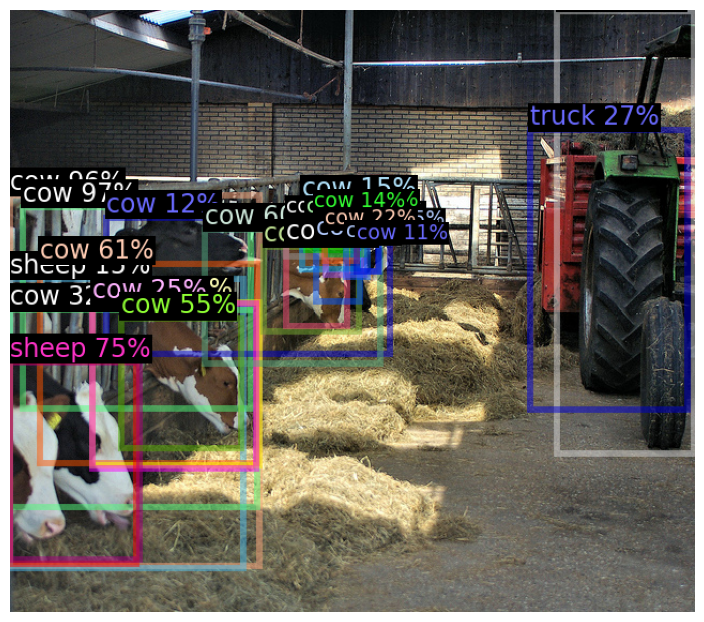

{'boxes': tensor([[  1.0071,   0.0000, 134.7180, 170.7147],
        [189.2855,   0.0000, 372.1975, 161.9195],
        [137.5023,  55.7322, 162.0427,  77.9638],
        [128.6020,  55.9351, 155.3514,  79.0469],
        [536.3586,  63.1356, 560.4949,  80.9125],
        [531.3582,  60.4899, 552.5092,  82.9121],
        [133.1843,  59.4689, 148.9132,  82.1232],
        [133.5907,  48.5624, 157.9021,  69.6921],
        [134.9524,  52.7687, 147.7410,  71.6676],
        [531.6247,  64.5760, 544.4626,  90.0719],
        [204.9095, 143.2097, 605.8176, 427.0000],
        [  0.0000, 143.6741, 343.6481, 421.5264],
        [  4.7632,  94.6415, 523.9619, 427.0000],
        [  0.0000,  96.8233, 628.3674, 415.9259]], device='mps:0'), 'labels': tensor([ 1,  1, 47, 47, 47, 47, 47, 47, 47, 47, 61, 61, 61, 67],
       device='mps:0'), 'scores': tensor([0.9879, 0.8401, 0.1929, 0.1686, 0.1440, 0.1333, 0.1327, 0.1257, 0.1253,
        0.1202, 0.6141, 0.5255, 0.2756, 0.1100], device='mps:0'), 'masks': tensor([

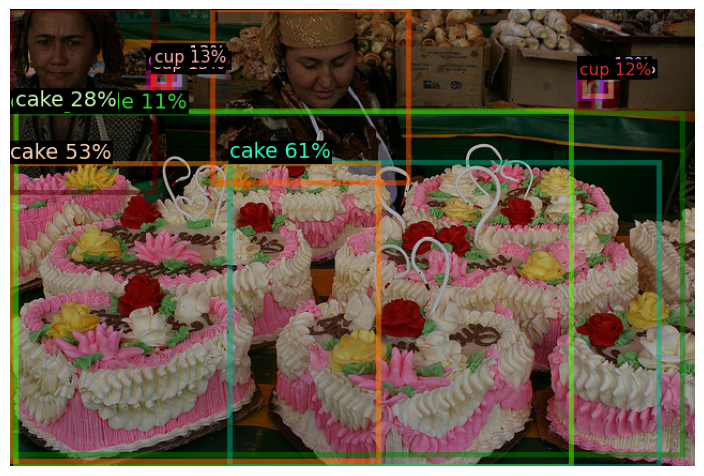

{'boxes': tensor([[317.1527, 171.7926, 328.8554, 188.5040],
        [314.6355, 170.0240, 333.9329, 186.6764],
        [303.0170, 165.7997, 332.1785, 204.6072],
        [174.0962, 177.8175, 399.6177, 226.8702],
        [ 53.7824, 168.2656, 288.2986, 228.0257],
        [195.5880, 175.5768, 253.3185, 210.4227]], device='mps:0'), 'labels': tensor([1, 1, 1, 9, 9, 9], device='mps:0'), 'scores': tensor([0.1703, 0.1185, 0.1060, 0.5150, 0.3360, 0.1282], device='mps:0'), 'masks': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

 

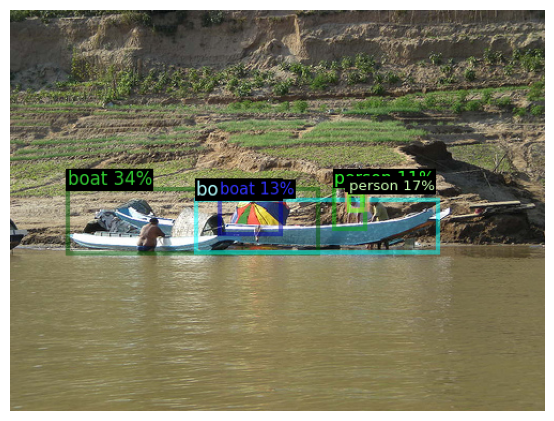

{'boxes': tensor([], device='mps:0', size=(0, 4)), 'labels': tensor([], device='mps:0', dtype=torch.int64), 'scores': tensor([], device='mps:0'), 'masks': tensor([], size=(0, 427, 640))}


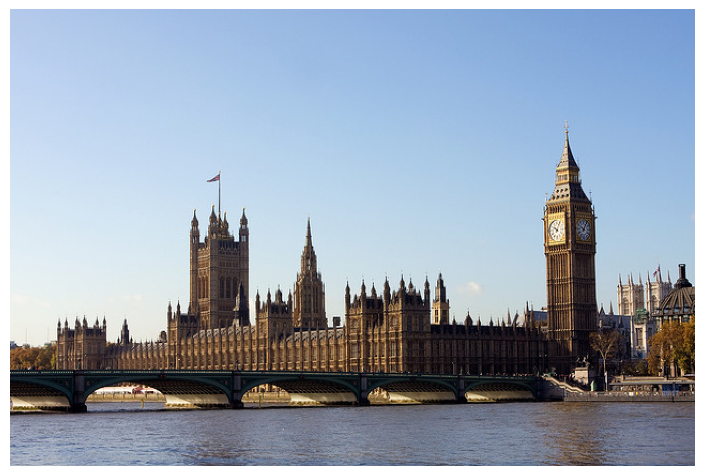

{'boxes': tensor([[135.5385,  68.3688, 320.4554, 330.5681],
        [365.0020,  92.3434, 418.6423, 249.5541],
        [  6.0094, 185.5377,  57.6815, 248.4223],
        [ 14.0034, 191.9131,  49.1397, 246.8317],
        [ 69.3626, 153.2296,  95.8373, 173.2517],
        [ 86.3728,  17.9211, 263.9487,  93.3912],
        [ 76.9892,  12.2816, 266.2530, 130.4647],
        [257.5389, 212.0972, 316.4154, 259.0850],
        [259.5592, 211.2625, 319.1479, 261.0064],
        [ 17.4482, 159.4748,  51.8813, 188.8536],
        [124.0302, 163.1438, 159.0306, 219.6964],
        [ 23.9353, 150.3184,  48.6170, 191.5460],
        [ 86.6509, 157.0768, 165.6016, 239.2948],
        [ 16.5273, 154.7964,  44.4008, 183.8411],
        [ 16.2559, 148.4777,  54.6508, 193.2646],
        [ 23.2456, 167.0623,  43.9281, 191.0630],
        [ 24.1936, 152.0724,  44.1831, 178.1103],
        [ 98.7595, 168.8299, 154.1620, 228.8530],
        [ 26.0199, 139.6657,  50.8674, 184.2390],
        [ 22.1745, 148.7942,  62.5883, 1

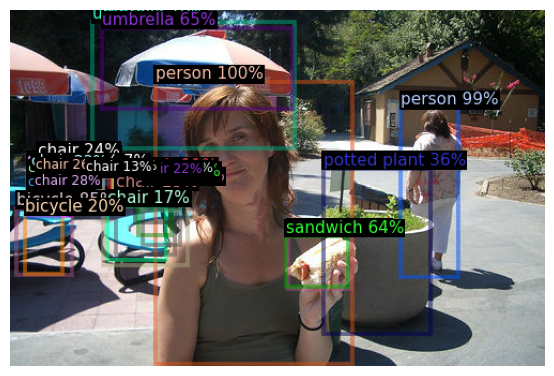

In [9]:
import pytorch_mask_rcnn.visualizer as vis
iters = 5

for i, (image, target) in enumerate(d):
    image = image.to(device)[0]
    target = {k: v.to(device) for k, v in target.items()}
    
    with torch.no_grad():
        result = model(image)
        print(result)
    
    vis.show(image, result, ds.classes, "/Users/nyanziba/Assignment/PyTorch-Simple-MaskRCNN/image".format(i))

    if i >= iters - 1:
        break